In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
url = "https://raw.githubusercontent.com/Aadya-Anil/Diabetes-Detection/main/Diabetes%20data.csv"
dt = pd.read_csv(url, encoding = 'Windows-1252')
dt.columns 

Index(['Unnamed: 0', 'Pregnancies', 'Glucose', 'BloodPressure',
       'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age',
       'Outcome'],
      dtype='object')

In [96]:
dt.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,NaN,6,148,72,35,0,33.6,0.627,50,1
1,NaN,1,85,66,29,0,26.6,0.351,31,0
2,NaN,8,183,64,0,0,23.3,0.672,32,1
3,NaN,1,89,66,23,94,28.1,0.167,21,0
4,NaN,0,137,40,35,168,43.1,2.288,33,1


In [97]:
print("Diabetes data set dimensions : {}".format(dt.shape))

Diabetes data set dimensions : (768, 10)


In [98]:
dt.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

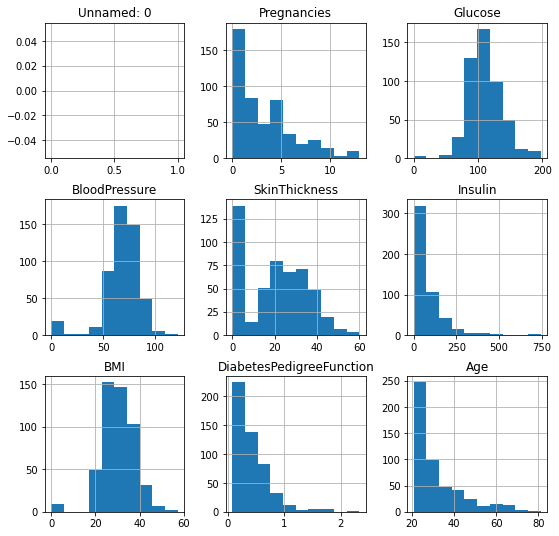

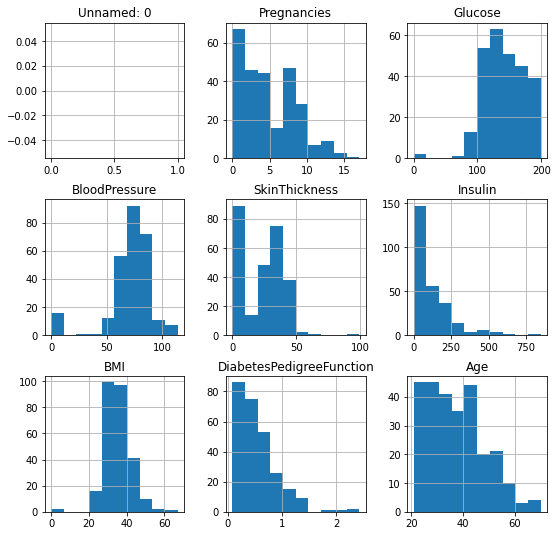

In [99]:
dt.groupby('Outcome').hist(figsize=(9, 9))

In [100]:
dt.isnull().sum()
dt.isna().sum()

Unnamed: 0                  768
Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [101]:
print("Total : ", dt[dt.BloodPressure == 0].shape[0])

Total :  35


In [102]:
print(dt[dt.BloodPressure == 0].groupby('Outcome')['Age'].count())

Outcome
0    19
1    16
Name: Age, dtype: int64


In [103]:
print("Total : ", dt[dt.Glucose == 0].shape[0])

Total :  5


In [104]:
print(dt[dt.Glucose == 0].groupby('Outcome')['Age'].count())

Outcome
0    3
1    2
Name: Age, dtype: int64


In [105]:
print("Total : ", dt[dt.SkinThickness == 0].shape[0])

Total :  227


In [106]:
print(dt[dt.SkinThickness == 0].groupby('Outcome')['Age'].count())

Outcome
0    139
1     88
Name: Age, dtype: int64


In [107]:
print("Total : ", dt[dt.BMI == 0].shape[0])
print(dt[dt.BMI == 0].groupby('Outcome')['Age'].count())

Total :  11
Outcome
0    9
1    2
Name: Age, dtype: int64


In [108]:
print("Total : ", dt[dt.Insulin == 0].shape[0])
print(dt[dt.Insulin == 0].groupby('Outcome')['Age'].count())

Total :  374
Outcome
0    236
1    138
Name: Age, dtype: int64


In [109]:
diabetes_mod = dt[(dt.BloodPressure != 0) & (dt.BMI != 0) & (dt.Glucose != 0)]
print(diabetes_mod.shape)

(724, 10)


In [111]:
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes_mod[feature_names]
y = diabetes_mod.Outcome

In [112]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [113]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = diabetes_mod.Outcome, random_state=0)

In [118]:
names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred)*100)
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


  Name      Score
0  KNN  72.928177
1  SVC  74.033149
2   LR  76.243094
3   DT  71.823204
4  GNB  73.480663
5   RF  78.453039
6   GB  77.348066
